# IIMPORT LIBRARIES and DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
import torch
import torch.nn as nn


In [2]:
song_data = pd.read_csv(r"song_data.csv")
onk_song = pd.read_csv(r"10000.txt", sep='\t', header=None, names=['user','song','play_count'])

In [3]:
song_data.head()

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0


In [4]:
onk_song.head()

,user,song,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [5]:
merged_data = pd.merge(onk_song, 
                       song_data, how='left', 
                       left_on='song', 
                       right_on='song_id')
merged_data.rename(columns={'play_count':'listen_count'},inplace=True)
del(merged_data['song_id'])

In [6]:
merged_data.head()

,user,song,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005


# DATA CLEANING

### It is time to have only clean data

In [7]:
merged_data_cleaned=merged_data.drop(["release","artist_name"],axis=1)

In [8]:
merged_data_cleaned

,user,song,listen_count,title,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,2007
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,2005
...,...,...,...,...,...
2086941,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),0
2086942,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,2009
2086943,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),2007
2086944,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,2010


In [9]:
merged_data_cleaned.user.nunique()

76353

In [10]:
merged_data_cleaned.shape

(2086946, 5)

In [11]:
merged_data_cleaned.isna().sum()

user            0
song            0
listen_count    0
title           0
year            0
dtype: int64

### Let's solve the 0 problem in the year 

In [12]:
merged_data_cleaned[merged_data_cleaned.year==0]

,user,song,listen_count,title,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,0
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1,Sehr kosmisch,0
12,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOIZAZL12A6701C53B,5,I'll Be Missing You (Featuring Faith Evans & 1...,0
14,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOJPFQG12A58A7833A,1,Clarity,0
15,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOKRIMP12A6D4F5DA3,5,I?'m A Steady Rollin? Man,0
...,...,...,...,...,...
2086899,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOBOUPA12A6D4F81F1,7,Sincerité Et Jalousie,0
2086909,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SODJWHY12A8C142CCE,2,Hey_ Soul Sister,0
2086922,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOFRQTD12A81C233C0,9,Sehr kosmisch,0
2086924,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOGGPKT12A8C1424BE,1,Into The Night,0


In [13]:
merged_data_cleaned["no_year"]=False

In [14]:
merged_data_cleaned.head()

,user,song,listen_count,title,year,no_year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,0,False
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,1976,False
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,2007,False
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,2007,False
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,2005,False


In [15]:
merged_data_cleaned["no_year"]=merged_data_cleaned.year==0

### IQR- Let's save ourself from outliers

In [16]:
numerical_columns=merged_data_cleaned.select_dtypes(include=np.number).columns.tolist()
numerical_columns

['listen_count', 'year']

In [17]:
numerical_columns.remove('year')
numerical_columns

['listen_count']

In [18]:
sparse_columns=[]
for col in numerical_columns:
    if (merged_data_cleaned[col].quantile(0.01)==merged_data_cleaned[col].quantile(0.25)==merged_data_cleaned[col].mode()[0]):
        sparse_columns.append(col)

sparse_columns_2=[]
for col in numerical_columns:
    if (merged_data_cleaned[col].quantile(0.01)==merged_data_cleaned[col].quantile(0.25)):
        sparse_columns_2.append(col)

In [19]:
len(numerical_columns), len(sparse_columns), len(sparse_columns_2)

(1, 1, 1)

In [20]:
def HardEdgeReduction(df,numerical_columns,sparse_columns,upper_quantile=0.99,lower_quantile=0.01):
    
    import pandas as pd

    import psutil, os, gc, time
    print("HardEdgeReduction process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()
    
    # Do outlier cleaning in only one loop
    epsilon = 0.0001 # for zero divisions

    # Define boundaries that we will use for Reduction operation

    df_outlier_cleaned = df.copy()

    print("Detected outliers will be replaced with edged quantiles/percentiles: 1% and 99%!\n")
    print("Total number of rows is: %s\n"%df_outlier_cleaned.shape[0])

    outlier_boundries_dict={}
#     lower_bound_sparse=[]
#     upper_bound_sparse=[]

    for col in numerical_columns:

        if col in sparse_columns:

            # First ignore the 'sparse' data points:
            nonsparse_data = pd.DataFrame(df_outlier_cleaned[df_outlier_cleaned[col] !=\
                                                             df_outlier_cleaned[col].mode()[0]][col]) 
            
            #we used only mode to catch sparse points, since we know/proved it is enough to do that.

            # Find Outlier Thresholds:
            # Note: All columns are right-skewed
            # For lower threshold (left-hand-side)
            if nonsparse_data[col].quantile(lower_quantile) < df_outlier_cleaned[col].mode()[0]: #Unexpected case
                lower_bound_sparse = nonsparse_data[col].quantile(lower_quantile)
            else:
                lower_bound_sparse = df_outlier_cleaned[col].mode()[0]
            
            # For upper threshold (right-hand-side)
            if nonsparse_data[col].quantile(upper_quantile) < df_outlier_cleaned[col].mode()[0]: #Unexpected case
                upper_bound_sparse = df_outlier_cleaned[col].mode()[0]
            else:
                upper_bound_sparse = nonsparse_data[col].quantile(upper_quantile)

            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse)

            # Inform user about the cardinality of Outlier existence:
            number_of_outliers = len(df_outlier_cleaned[(df_outlier_cleaned[col] < lower_bound_sparse) |\
                                                        (df_outlier_cleaned[col] > upper_bound_sparse)][col])
            print("Sparse: Outlier number in {} is equal to: ".format(col),number_of_outliers/(nonsparse_data.shape[0] -
                                                                                       nonsparse_data.isnull().sum()))

            # Replace Outliers with Edges --> 1% and 99%:
            if number_of_outliers > 0:

                # Replace 'left-hand-side' outliers with its 1% quantile value
                df_outlier_cleaned.loc[df_outlier_cleaned[col] < lower_bound_sparse,col] = lower_bound_sparse - epsilon # --> MAIN DF CHANGED

                # Replace 'right-hand-side' outliers with its 99% quantile value
                df_outlier_cleaned.loc[df_outlier_cleaned[col] > upper_bound_sparse,col] = upper_bound_sparse + epsilon # --> MAIN DF CHANGED

        else:
            # Find Edges:
            number_of_outliers = len(df_outlier_cleaned[(df_outlier_cleaned[col] < \
                                                         df_outlier_cleaned[col].quantile(lower_quantile))|\
                                                        (df_outlier_cleaned[col] > \
                                                         df_outlier_cleaned[col].quantile(upper_quantile))]\
                                     [col])
            print("Other: Outlier number in {} is equal to: ".format(col),number_of_outliers/(df[col].shape[0] -
                                                                                       df[col].isnull().sum())) 

            # Replace 'Standard' outliers:
            if number_of_outliers > 0:
                # Replace all outliers with its %99 quartile
                lower_bound_sparse = df_outlier_cleaned[col].quantile(lower_quantile)
                df_outlier_cleaned.loc[df_outlier_cleaned[col] < \
                                       lower_bound_sparse,col] \
                = lower_bound_sparse  - epsilon

                upper_bound_sparse = df_outlier_cleaned[col].quantile(upper_quantile)
                df_outlier_cleaned.loc[df_outlier_cleaned[col] > \
                                       upper_bound_sparse,col] \
                = upper_bound_sparse  + epsilon

            outlier_boundries_dict[col]=(lower_bound_sparse,upper_bound_sparse)


    print('HardEdgeReduction process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    return df_outlier_cleaned, outlier_boundries_dict


In [21]:
 merged_data_cleaned, outlier_boundries_dict = HardEdgeReduction(merged_data_cleaned,numerical_columns,sparse_columns)

HardEdgeReduction process has began:

Detected outliers will be replaced with edged quantiles/percentiles: 1% and 99%!

Total number of rows is: 2086946

Sparse: Outlier number in listen_count is equal to:  listen_count    0.009484
dtype: float64
HardEdgeReduction process has been completed!
--- in 0.007868293921152751 minutes ---


In [22]:
outlier_boundries_dict

{'listen_count': (1, 39.0)}

In [23]:
merged_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2086946 entries, 0 to 2086945
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user          object 
 1   song          object 
 2   listen_count  float64
 3   title         object 
 4   year          int64  
 5   no_year       bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 97.5+ MB


### Let's drop duplicates

In [24]:
merged_data_cleaned=merged_data_cleaned.drop_duplicates()


In [25]:
merged_data_cleaned.shape

(2015999, 6)

In [26]:
merged_data_cleaned_1=merged_data_cleaned.year!=0

In [27]:
merged_data_cleaned_1=merged_data_cleaned[merged_data_cleaned_1]

In [28]:
merged_data_cleaned_1

,user,song,listen_count,title,year,no_year
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2.0,Entre Dos Aguas,1976,False
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1.0,Stronger,2007,False
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1.0,Constellations,2005,False
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1.0,Learn To Fly,1999,False
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5.0,Apuesta Por El Rock 'N' Roll,2007,False
...,...,...,...,...,...,...
2086940,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOIOESO12A6D4F621D,4.0,Unwell (Album Version),2003,False
2086942,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4.0,Two Is Better Than One,2009,False
2086943,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3.0,What I've Done (Album Version),2007,False
2086944,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1.0,Up,2010,False


In [29]:
merged_data_cleaned=merged_data_cleaned_1.copy()

In [30]:
merged_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640946 entries, 1 to 2086945
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   user          1640946 non-null  object 
 1   song          1640946 non-null  object 
 2   listen_count  1640946 non-null  float64
 3   title         1640946 non-null  object 
 4   year          1640946 non-null  int64  
 5   no_year       1640946 non-null  bool   
dtypes: bool(1), float64(1), int64(1), object(3)
memory usage: 76.7+ MB


In [31]:
merged_data_cleaned.year.min()

1954

In [32]:
import ipywidgets as widgets
@widgets.interact_manual(
    Year = range(1954,2011))
def plot(Year = 2020):
    arpop = merged_data_cleaned[merged_data_cleaned['year'] == Year]
    arpop = pd.DataFrame(arpop.groupby('title')['listen_count'].sum()).sort_values('listen_count').tail(10).reset_index()
    fig = plt.figure(figsize=(15,5))
    plt.bar( arpop['title'],
             arpop['listen_count'],
             width=0.45,
             color = ['#caf0f8','#ade8f4','#90e0ef','#48cae4','#00b4d8','#0096c7','#0077b6','#023e8a','#03045e','#14213d'])
#     ax = df.plot(kind='barh', 
#           figsize = (8, 5), 
#           width = 0.5,
#           color='#75daad')
    plt.xticks(rotation=45,ha='right')
    t='Top 10 Most Popular Songs from '+str(Year)
    plt.title(t,y=1.1,fontsize=20)
    plt.xlabel('title')
    plt.ylabel('listen_count (Ranges from 0 to 100)')


interactive(children=(Dropdown(description='Year', options=(1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 19…

## Creating mapping for users and songs

* We will have weigts associated with users and songs, and we will take corresponding ones and feed them to the model.
* But to do that, we should create mapping for songs and users so that when we want to take weights at specific index, we will use mapped values

In [33]:
d_song = {}
for i, e in enumerate(merged_data_cleaned["song"].unique()):  #İNDEX VE DEĞER Döndürür
    d_song[e] = i

In [34]:
d_song

{'SOBBMDR12A8C13253B': 0,
 'SOBXHDL12A81C204C0': 1,
 'SOBYHAJ12A6701BF1D': 2,
 'SODACBL12A8C13C273': 3,
 'SODDNQT12A6D4F5F7E': 4,
 'SODXRTY12AB0180F3B': 5,
 'SOFGUAY12AB017B0A8': 6,
 'SOHQWYZ12A6D4FA701': 7,
 'SOIYTOA12A6D4F9A23': 8,
 'SOJNNUA12A8AE48C7A': 9,
 'SOLLGNU12AF72A4D4F': 10,
 'SOMLMKI12A81C204BC': 11,
 'SOMSQJY12A8C138539': 12,
 'SONSAEZ12A8C138D7A': 13,
 'SOOKGRB12A8C13CD66': 14,
 'SOPCVQE12AC468AF36': 15,
 'SOQIVUD12AB01821D2': 16,
 'SOQLCKR12A81C22440': 17,
 'SORPMYJ12AF729EB90': 18,
 'SORWLTW12A670208FA': 19,
 'SORZASF12A6D4F8CFA': 20,
 'SOSYBEV12AB0182933': 21,
 'SOTRSFZ12A8C142BF6': 22,
 'SOUKXIN12A8C133C7F': 23,
 'SOVHRGF12A8C13852F': 24,
 'SOVYIYI12A8C138D88': 25,
 'SOWQLXP12AF72A08A2': 26,
 'SOWSPUS12AC468BEE3': 27,
 'SOXMIUS12A8C13CD59': 28,
 'SOYHEPA12A8C13097F': 29,
 'SOZOBWN12A8C130999': 30,
 'SODJTHN12AF72A8FCD': 31,
 'SOBDRND12A8C13FD08': 32,
 'SOCHBAJ12AAF3B3A4F': 33,
 'SOCZTMT12AF72A078E': 34,
 'SOHRQZQ12A6D4F81D2': 35,
 'SOJGMYY12AB01809BE': 36,
 'SOZMJFG12

In [35]:
d_user = {}
for i, e in enumerate(merged_data_cleaned["user"].unique()):
    d_user[e] = i

In [36]:
d_user

{'b80344d063b5ccb3212f76538f3d9e43d87dca9e': 0,
 '85c1f87fea955d09b4bec2e36aee110927aedf9a': 1,
 'bd4c6e843f00bd476847fb75c47b4fb430a06856': 2,
 '8937134734f869debcab8f23d77465b4caaa85df': 3,
 '969cc6fb74e076a68e36a04409cb9d3765757508': 4,
 '4bd88bfb25263a75bbdd467e74018f4ae570e5df': 5,
 'e006b1a48f466bf59feefed32bec6494495a4436': 6,
 '9d6f0ead607ac2a6c2460e4d14fb439a146b7dec': 7,
 '9bb911319fbc04f01755814cb5edb21df3d1a336': 8,
 'b64cdd1a0bd907e5e00b39e345194768e330d652': 9,
 '17aa9f6dbdf753831da8f38c71b66b64373de613': 10,
 'd6589314c0a9bcbca4fee0c93b14bc402363afea': 11,
 '5a905f000fc1ff3df7ca807d57edb608863db05d': 12,
 'c737ec8c1b16ce8e39115f4432c9a7fc21ec47a1': 13,
 '45544491ccfcdc0b0803c34f201a6287ed4e30f8': 14,
 'ed7d4c476013b1c3dd91982b61494bf7436083ba': 15,
 'baf47ed8da24d607e50d8684cde78b923538640f': 16,
 '169f9f4c68b62d1887c7c0ac99d10a79cfca5daf': 17,
 'a820d2d4f16bbd53be9e41e0417dfb234bfdfba8': 18,
 'bd8475385f0aa78830fa6dfce9e7242164b035c8': 19,
 '0afaa5d9d04bf85af720fe8cc566

In [37]:
merged_data_cleaned["user"] = merged_data_cleaned["user"].map(d_user)
#userid yerine dict teki indexler kullanılır
# bunlar mapping için kullanılır

In [38]:
merged_data_cleaned["song"] = merged_data_cleaned["song"].map(d_song)

In [39]:
merged_data_cleaned.sort_values(by=['song'])

,user,song,listen_count,title,year,no_year
1,0,0,2.0,Entre Dos Aguas,1976,False
1709,45,0,1.0,Entre Dos Aguas,1976,False
1236741,45331,0,6.0,Entre Dos Aguas,1976,False
542629,19878,0,1.0,Entre Dos Aguas,1976,False
1220464,44727,0,20.0,Entre Dos Aguas,1976,False
...,...,...,...,...,...,...
1394347,50911,8234,1.0,Baby [You've Got What It Takes] [with Sharon J...,2009,False
2022064,73834,8234,2.0,Baby [You've Got What It Takes] [with Sharon J...,2009,False
423942,15524,8234,1.0,Baby [You've Got What It Takes] [with Sharon J...,2009,False
1923128,70226,8234,2.0,Baby [You've Got What It Takes] [with Sharon J...,2009,False


### Preparing dataset for PyTorch

In [41]:
class Dataset():
    def __init__(self, df): 
        self.df = df
        
    def __len__(self): 
        return len(self.df)
    
# index vererek ilerde weight lere ulaşmayı sağlıyor.  indexler tutulur   
    def __getitem__(self, idxs):
        df_sub = self.df.iloc[idxs]
        return (torch.tensor(df_sub["user"].values), torch.tensor(df_sub["song"].values)), torch.tensor(df_sub["listen_count"].values, dtype = torch.float32) 
            

In [42]:
class DataLoader():
    def __init__(self, ds, bs): 
        self.ds, self.bs = ds, bs
    def __iter__(self):
        n = len(self.ds)
        l = torch.randperm(n)

        
        for i in range(0, n, self.bs): 
            idxs_l = l[i:i+self.bs]
            yield self.ds[idxs_l]

### Split Dataset

In [ ]:
import numpy as np
import random


In [44]:
merged_data_cleaned.user

1              0
2              0
4              0
5              0
6              0
           ...  
2086940    76063
2086942    76063
2086943    76063
2086944    76063
2086945    76063
Name: user, Length: 1640946, dtype: int64

In [46]:
merged_data_cleaned2=merged_data_cleaned.sample(200000,random_state=42)
deneme=merged_data_cleaned.sample(32,random_state=11)
deneme

,user,song,listen_count,title,year,no_year
407847,14959,4519,4.0,Transcendence,1996,False
195497,7099,1202,1.0,From Left To Right,2003,False
1499396,54755,546,1.0,I GOT THIS DOWN,2007,False
1893893,69200,6594,4.0,Here And Now,2001,False
5482,163,2753,1.0,Wuthering Heights,1977,False
1485085,54240,6570,1.0,Alexandra,1999,False
2086879,76062,5198,1.0,Open Your Eyes,2004,False
1150661,42205,2233,5.0,Older Chests,2003,False
29899,1056,65,5.0,Without Me,2002,False
1323176,48434,706,5.0,Time To Pretend,2005,False


In [43]:
merged_data_cleaned2.listen_count.value_counts()

1.0000     115021
2.0000      31348
3.0000      14127
5.0000       8938
4.0000       8262
6.0000       4371
7.0000       3022
8.0000       2225
10.0000      1804
9.0000       1669
11.0000      1243
12.0000       958
13.0000       817
39.0001       799
15.0000       693
14.0000       602
16.0000       488
17.0000       448
18.0000       363
19.0000       315
20.0000       306
21.0000       253
22.0000       220
23.0000       192
25.0000       185
24.0000       174
26.0000       143
27.0000       129
28.0000       115
31.0000       103
29.0000       102
32.0000        82
30.0000        73
35.0000        71
33.0000        65
36.0000        61
37.0000        60
34.0000        55
38.0000        53
39.0000        45
Name: listen_count, dtype: int64

In [48]:
mask = [True if x == 1 else False for x in np.random.uniform(0, 1, (len(merged_data_cleaned2))) < 1 - 0.2] 
# yüzde 20 val,%80 train den küçükse True. train df'e mask olarak koyar,
# val için false un tersini alıp oluşturur
neg_mask = [not x for x in mask]

In [49]:
train_df, valid_df = merged_data_cleaned2[mask], merged_data_cleaned2[neg_mask]

In [50]:
train_ds = Dataset(train_df)
train_dl = DataLoader(train_ds, 1024) # batch size

In [51]:
valid_ds = Dataset(valid_df)
valid_dl = DataLoader(valid_ds, 1024)


In [52]:
deneme_ds = Dataset(deneme)
deneme_dl = DataLoader(deneme_ds, 32)

In [53]:
xb,yb=next(iter(train_dl))

In [54]:
xbb,ybb=next(iter(deneme_dl))

In [55]:
train_df.shape

(159970, 6)

In [57]:
xb[0][56]
# 16146. user, 1116.song u 1 kez dinlemis

tensor(1698)

In [58]:
xb[1][56]

tensor(1539)

In [60]:
x=(torch.tensor([47157,47157,47157]),torch.tensor([945,946,947]))
x


(tensor([47157, 47157, 47157]), tensor([945, 946, 947]))

In [61]:
x[1]

tensor([945, 946, 947])

In [283]:
for i in range(0,1024):
    if 10< yb[i]:
        print(i,yb[i])
    

48 tensor(11.)
56 tensor(23.)
58 tensor(13.)
77 tensor(19.)
81 tensor(15.)
83 tensor(28.)
129 tensor(12.)
140 tensor(12.)
144 tensor(17.)
146 tensor(11.)
167 tensor(39.0001)
185 tensor(15.)
204 tensor(22.)
209 tensor(13.)
243 tensor(19.)
253 tensor(22.)
289 tensor(11.)
294 tensor(16.)
296 tensor(15.)
347 tensor(16.)
354 tensor(11.)
383 tensor(23.)
400 tensor(15.)
406 tensor(14.)
502 tensor(35.)
511 tensor(24.)
518 tensor(14.)
529 tensor(13.)
556 tensor(13.)
576 tensor(18.)
582 tensor(39.0001)
599 tensor(15.)
612 tensor(16.)
622 tensor(22.)
641 tensor(13.)
644 tensor(20.)
691 tensor(12.)
723 tensor(12.)
758 tensor(12.)
773 tensor(39.0001)
787 tensor(12.)
794 tensor(35.)
832 tensor(25.)
867 tensor(39.0001)
892 tensor(21.)
904 tensor(11.)
906 tensor(22.)
917 tensor(21.)
919 tensor(19.)
931 tensor(12.)
941 tensor(13.)
946 tensor(35.)
950 tensor(13.)
1006 tensor(32.)


# MODELING

### sigmoid

In [73]:
def sigmoid_range(x, low, high): 
    return torch.sigmoid(x) * (high-low) + low
# sigmoid range ayarlama

In [76]:
n_users = len(merged_data_cleaned["user"].unique())

n_songs = len(merged_data_cleaned["song"].unique())
n_years=len(merged_data_cleaned["year"].unique())
n_users,n_songs,n_years

(76064, 8235, 57)

In [74]:
class DotProductBias(nn.Module):
    def __init__(self, n_users, n_song, n_factors, y_range=(0,39.5)): #y_range:sigmoid range
        super().__init__()
        self.user_factors = nn.Parameter(torch.zeros(n_users, n_factors).normal_()) 
        self.user_bias = nn.Parameter(torch.zeros(n_users,1).normal_()) #latent fac. yok
        
        self.song_factors = nn.Parameter(torch.zeros(n_songs, n_factors).normal_())
        self.song_bias = nn.Parameter(torch.zeros(n_songs,1).normal_())
        
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors[x[0]]           #user indexi
        songs = self.song_factors[x[1]]
        
        res = (users * songs).sum(dim=1, keepdim=True)           #çarpımdan sonra bias ekleniyor
        res += self.user_bias[x[0]] + self.song_bias[x[1]]
        return sigmoid_range(res, *self.y_range)

In [77]:
model = DotProductBias(n_users, n_songs, 50) #latent fac. 50, çok fazla o yüzden pca
optim = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-3)

In [164]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("\nOptimizer's state_dict:")
for var_name in optim.state_dict():
    print(var_name, "\t", optim.state_dict()[var_name])

Model's state_dict:
user_factors 	 torch.Size([76064, 50])
user_bias 	 torch.Size([76064, 1])
song_factors 	 torch.Size([8235, 50])
song_bias 	 torch.Size([8235, 1])

Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.01, 'betas': (0.9, 0.999), 'eps': 1e-08, 'weight_decay': 0.001, 'amsgrad': False, 'params': [1355273182664, 1355287655264, 1355287655048, 1355277138248]}]


In [57]:
def mean_sqr(preds, targets):
    return ((preds.squeeze() - targets) ** 2).mean()

In [58]:
loss_func = mean_sqr

In [218]:
n_train = len(train_df)
n_train

160264

In [219]:
n_valid = len(valid_df)
n_valid

39736

# Model 1 

In [220]:
def train(model, epochs=5, valid_epoch=5):
    for epoch in range(1, epochs+1):
        model = model.train()
        loss_train = 0
        loss_valid = 0
        for xb, yb in train_dl:
            
            preds = model(xb)
            loss = loss_func(preds, yb)
            loss.backward()
            optim.step()
            optim.zero_grad()
            loss_train += loss * len(xb)
        predss=[]
        predss.append(preds)
        model_2=model
        if epoch  % valid_epoch == 0:
            model = model.eval() # degerlendirme/test modu. bash norm,droupout gibi degisiklik yapma 
            
            for xb, yb in valid_dl:
                with torch.no_grad(): #GRADYAN hesaplamasını istemiyoruz val.e bakarken
                    loss_valid += loss_func(model(xb), yb) * len(xb)
            print(f"training loss: {loss_train/n_train} | validation loss: {loss_valid/n_valid}")
    return predss,model,model_2
        

In [221]:
aa,bb,cc=train(model,64,2)

training loss: 0.6320862770080566 | validation loss: 1.01296067237854
training loss: 0.1740274280309677 | validation loss: 0.7818965911865234
training loss: 0.07964242249727249 | validation loss: 0.5953537225723267
training loss: 0.03896525129675865 | validation loss: 0.4302592873573303
training loss: 0.025410674512386322 | validation loss: 0.29719382524490356
training loss: 0.02236991748213768 | validation loss: 0.20353852212429047
training loss: 0.02216274105012417 | validation loss: 0.14434067904949188
training loss: 0.022431984543800354 | validation loss: 0.11090999841690063
training loss: 0.022742491215467453 | validation loss: 0.0930219367146492
training loss: 0.02310764230787754 | validation loss: 0.0836559534072876
training loss: 0.02355438843369484 | validation loss: 0.07855331152677536
training loss: 0.02410256303846836 | validation loss: 0.07592225074768066
training loss: 0.024408865720033646 | validation loss: 0.07434413582086563
training loss: 0.024797044694423676 | valida

In [224]:
model.user_factors.shape

torch.Size([76064, 50])

In [225]:
xb,yb=next(iter(train_dl))

In [230]:
xb[0]

tensor([35714, 73596, 43604,  ..., 19776, 74796,  7114])

In [231]:
xb[1]

tensor([8078, 1996, 8104,  ...,  647,   75, 5138])

In [232]:
xb[2]

tensor([1993, 2009, 2007,  ..., 2004, 2009, 2003])

In [233]:
yb

tensor([5., 1., 1.,  ..., 1., 1., 2.])

In [ ]:
xb[0]

In [222]:
for xb, yb in deneme_dl:
            
            preds = cc(xb)
            print("preds")
            print(preds[0:5])
            print(yb)


preds
tensor([[4.8555],
        [3.1706],
        [5.6641],
        [3.6665],
        [6.7075]], grad_fn=<SliceBackward>)
tensor([ 1.,  1.,  1.,  2., 11.,  4.,  2.,  4.,  1.,  1.,  1.,  3., 11.,  1.,
         1.,  1.,  2.,  2.,  1.,  5.,  5.,  5.,  6.,  1.,  1.,  1.,  4.,  1.,
         1.,  3.,  7.,  1.])


In [63]:
merged_data_cleaned2.shape

(200000, 6)

# Model 2 - (Our main model)

* Keep in mind that only a limited number of optimizers support sparse gradients: currently it’s optim.SGD (CUDA and CPU), optim.SparseAdam (CUDA and CPU) and optim.Adagrad (CPU)

In [67]:
class collab_deep_2(nn.Module):
    def __init__(self, n_users, n_songs, n_factors, y_range=(0,39.5), n_act=100):
#         hiddenL 100 act fonk output olucak sonra 1
        super().__init__()
        self.user_factors = torch.nn.Embedding(n_users, n_factors)
        self.song_factors = torch.nn.Embedding(n_songs, n_factors)

        self.layers = nn.Sequential(
            nn.Linear(2 * n_factors + 1, n_act), #+1 case 1 deki çarpım
            nn.ReLU(),
            
            nn.Linear(n_act, 1))
        self.y_range = y_range
        
    def forward(self, x):
        users = self.user_factors(x[0])
        songs = self.song_factors(x[1])
        
        embs = users,songs,(users*songs).sum(dim=1, keepdim = True)
        x = self.layers(torch.cat(embs, dim=1))
        return sigmoid_range(x, *self.y_range)

In [123]:
model2 = collab_deep_2(n_users, n_songs, 50)
optim = torch.optim.Adam(model2.parameters(), lr=0.01, weight_decay=1e-3)

In [124]:
train(model2,32,2)

training loss: 0.030016260221600533 | validation loss: 0.058148838579654694
training loss: 0.02332652360200882 | validation loss: 0.05577128380537033
training loss: 0.016388289630413055 | validation loss: 0.05846147611737251
training loss: 0.008281742222607136 | validation loss: 0.05986957252025604
training loss: 0.006194511894136667 | validation loss: 0.05948426574468613
training loss: 0.005384947173297405 | validation loss: 0.060103341937065125
training loss: 0.0052672335878014565 | validation loss: 0.061074718832969666
training loss: 0.005098787602037191 | validation loss: 0.0612342469394207
training loss: 0.004784582182765007 | validation loss: 0.061559394001960754
training loss: 0.004658167716115713 | validation loss: 0.06215423718094826
training loss: 0.004471115302294493 | validation loss: 0.06249275431036949
training loss: 0.0044042859226465225 | validation loss: 0.06297948211431503
training loss: 0.004389520734548569 | validation loss: 0.06365089118480682
training loss: 0.0042

[tensor([[1.1316e+00],
         [2.0400e+00],
         [1.9584e+00],
         [1.1841e+00],
         [1.9575e+00],
         [2.2321e+00],
         [1.5905e+00],
         [2.7161e-01],
         [4.1048e+00],
         [1.8483e+00],
         [1.0667e+00],
         [1.1981e+00],
         [1.2209e+00],
         [7.2604e-01],
         [2.2632e+00],
         [2.4087e+00],
         [7.8125e-01],
         [1.1472e+00],
         [2.1373e+00],
         [7.4921e-01],
         [1.6033e+00],
         [1.3022e+00],
         [1.6981e+00],
         [1.9752e+00],
         [1.5727e+00],
         [2.1018e+00],
         [1.7422e+00],
         [3.5425e+01],
         [1.1411e+00],
         [2.4509e+00],
         [1.5914e+00],
         [1.0500e+00],
         [1.5629e+00],
         [1.5699e+00],
         [2.0674e+00],
         [8.9160e-01],
         [1.5369e+00],
         [3.1623e+00],
         [2.7502e+00],
         [2.1732e+00],
         [3.0383e+00],
         [3.7426e+00],
         [1.4248e+00],
         [3

In [75]:
# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model2.state_dict():
    print(param_tensor, "\t", model2.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("\nOptimizer's state_dict:")
for var_name in optim.state_dict():
    print(var_name, "\t", optim.state_dict()[var_name])

Model's state_dict:
user_factors.weight 	 torch.Size([76064, 50])
song_factors.weight 	 torch.Size([8235, 50])
layers.0.weight 	 torch.Size([100, 101])
layers.0.bias 	 torch.Size([100])
layers.2.weight 	 torch.Size([1, 100])
layers.2.bias 	 torch.Size([1])

Optimizer's state_dict:
state 	 {2347297727112: {'step': 5024, 'exp_avg': tensor([[ 3.4720e-12,  6.6962e-11,  1.7064e-20,  ...,  3.7600e-18,
         -5.7608e-23,  6.3643e-15],
        [-1.4062e-08, -1.3932e-10, -5.1041e-14,  ..., -1.0182e-14,
         -8.8209e-17, -2.2334e-16],
        [ 3.0933e-14, -1.9078e-17, -4.5027e-17,  ...,  1.7714e-20,
         -1.5975e-43,  1.4192e-16],
        ...,
        [ 4.9045e-44,  2.5823e-28,  1.1631e-43,  ...,  2.1019e-44,
         -2.9427e-44, -4.0638e-44],
        [ 3.4162e-17, -5.1848e-44,  2.9767e-17,  ..., -3.4715e-12,
         -3.0203e-08,  1.0085e-14],
        [-1.8368e-14,  2.0234e-16, -5.5639e-16,  ..., -5.0924e-15,
         -4.2002e-15,  8.5959e-14]]), 'exp_avg_sq': tensor([[8.4122e-14, 

### Printing Song Title According to Given Song Value

In [296]:

d_song_title = {}
for e, m in zip(merged_data_cleaned2["song"], merged_data_cleaned2["title"]):
    d_song_title[e] = m

In [298]:
song_bias = model.song_bias.squeeze()
idxs = song_bias.argsort()[:5]
[d_song_title[i.item()] for i in idxs]

['Waterfall', 'Yeah!', 'Halo', 'They Might Follow You', 'Rock Star']

In [303]:
idxs = song_bias.argsort(descending = True)[:10]
[d_song_title[i.item()] for i in idxs]

['Boots On',
 'All Over Me',
 'Naked Sunday (LP Version)',
 'Sister Seagull',
 'The Quest',
 'Break Your Little Heart',
 'Little House',
 'Ort',
 'Blood Red',
 'Close My Eyes Forever']

In [501]:
merged_data_cleaned.song.nunique()

8235

In [302]:
idxs = song_bias.argsort(descending = False)[:10]
[d_song_title[i.item()] for i in idxs]

['Waterfall',
 'Yeah!',
 'Halo',
 'They Might Follow You',
 'Rock Star',
 'Somebody To Love',
 'Just Dance',
 'Clocks',
 'Dollhouse',
 'Marshall Examines His Carcass']

# Music Recommendation Part

* Below we will suggest new songs for user number 47157. We will also try to guess how many times user 47157 can listen to these songs.

In [65]:
abd=merged_data_cleaned2.groupby('song').get_group(5776)
abd

,user,song,listen_count,title,year,no_year
1298277,47555,5776,1.0000,Big Boss Man,1968,False
1622912,59316,5776,39.0001,Big Boss Man,1968,False
367648,13446,5776,34.0000,Big Boss Man,1968,False
1773021,64753,5776,2.0000,Big Boss Man,1968,False
517504,18947,5776,6.0000,Big Boss Man,1968,False
294370,10728,5776,3.0000,Big Boss Man,1968,False
571595,20962,5776,1.0000,Big Boss Man,1968,False
899773,33076,5776,23.0000,Big Boss Man,1968,False
364455,13310,5776,2.0000,Big Boss Man,1968,False
18615,674,5776,39.0001,Big Boss Man,1968,False


In [66]:
abd=merged_data_cleaned2.groupby('user').get_group(47157)
abd

,user,song,listen_count,title,year,no_year
1287670,47157,7887,1.0,Wendy Clear,1998,False
1287704,47157,3036,2.0,No Puedo Evitar (Pensar En Ti),1986,False
1287728,47157,4081,1.0,What's The Difference,1999,False
1287743,47157,543,4.0,Tighten Up,2010,False
1287689,47157,252,7.0,Ain't No Rest For The Wicked (Original Version),2008,False
1287679,47157,3259,1.0,Taylor,2003,False
1287703,47157,945,23.0,All The Right Moves,2009,False
1287687,47157,3721,1.0,From Where You Are,2010,False
1287773,47157,7091,1.0,Space Cowboy,2005,False
1287720,47157,956,1.0,Paradise City,1987,False


In [67]:
abd=merged_data_cleaned2.groupby('song').get_group(5776)
abd.title.iloc[0]

'Big Boss Man'

In [68]:
abd1=merged_data_cleaned2.groupby('song').get_group(264)
abd1.title.iloc[0]

'Blood Red'

In [69]:
abd2=merged_data_cleaned2.groupby('song').get_group(4214)
abd2.title.iloc[0]

'All Over Me'

In [70]:
abd1=merged_data_cleaned2.groupby('song').get_group(5423)
abd1.title.iloc[0]

'Boots On'

In [496]:
'Big Boss Man'
'Blood Red'
'All Over Me'
'Boots On'

'Boots On'

In [444]:
merged_data_cleaned2.iloc[top_si]
merged_data_cleaned2[]

,user,song,listen_count,title,year,no_year
1684597,61533,4562,1.0,Spiderwebs,1995,False
132335,4827,1518,5.0,Sugar Ray (LP Version),2004,False
1366774,49965,206,1.0,Black Wave (Album),2007,False
1294495,47410,2297,11.0,Make Her Say,2009,False
1011455,37155,2311,6.0,Hot Boyz (w/ Dear Nora),2009,False
1128349,41398,5066,5.0,Imprint After,2010,False
822326,30283,986,1.0,Mercy:The Laundromat,1993,False
816055,30066,3777,1.0,First Dance,2010,False
2028410,74054,6612,1.0,Holiday,1983,False


In [78]:
kullanici=47157
song=8000
tahmin=[]
for q in range(0,8000):
    x=(torch.tensor([kullanici]),torch.tensor([q]))
    sonuc=model(x)
    tahmin.append(sonuc)
    
  

In [421]:
np.max(tahmin),np.min(tahmin)

(tensor([[21.7794]], grad_fn=<AddBackward0>),
 tensor([[1.1324]], grad_fn=<AddBackward0>))

In [422]:
np.argmax(tahmin)

5776

In [79]:
top_tahmin=np.sort(tahmin)[:-10:-1]

In [80]:
top_si=np.argsort(tahmin)[:-10:-1]

### RECOMMENDED SONGS AND APPROXIMATELY LISTENING NUMBERS FOR USER 47157

In [81]:
top_tahmin, top_si

(array([tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>),
        tensor([[39.5000]], grad_fn=<AddBackward0>)], dtype=object),
 array([6324, 6246, 5926, 6896, 4156, 2762,   56, 4899,  195], dtype=int64))

In [445]:
top_si

array([5776,  264, 4214, 5423,  945, 7208, 1468,  971, 3708], dtype=int64)

In [451]:
tahmin[5776]

tensor([[21.7794]], grad_fn=<AddBackward0>)

In [383]:
x=(torch.tensor([kullanici]),torch.tensor([5]))
x

(tensor([47157]), tensor([5]))

In [384]:
torch.tensor(kullanici)

tensor(47157)

In [385]:
model(x)

tensor([[3.9613]], grad_fn=<AddBackward0>)

# PCA

* Now we will examine how the songs in the data set are distributed according to their bias.

In [294]:
d_title_song = {}
for e, m in zip(merged_data_cleaned2["song"], merged_data_cleaned2["title"]):
    d_title_song[m] = e

def pca(x:torch.tensor, k=2):
    "Compute PCA of `x` with `k` dimensions."
    x = x-torch.mean(x,0)
    U,S,V = torch.svd(x.t())
    return torch.mm(x,U[:,:k])

In [72]:
def pca(x:torch.tensor, k=2):
    "Compute PCA of `x` with `k` dimensions."
    x = x-torch.mean(x,0)
    U,S,V = torch.svd(x.t())
    return torch.mm(x,U[:,:k])

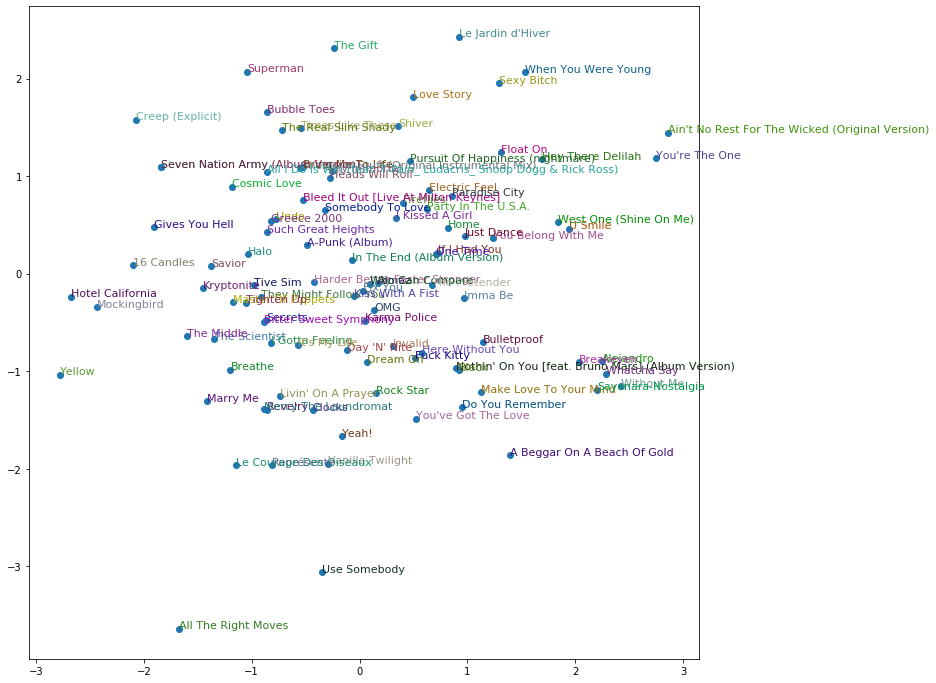

In [98]:
g = merged_data_cleaned2.groupby('title')['listen_count'].count()
top_songs = g.sort_values(ascending=False).index.values[:2000]
top_idxs = torch.tensor([d_title_song[m] for m in top_songs])
song_w = model2.song_factors(top_idxs).cpu().detach()
song_pca = pca(song_w,5)
fac0,fac1,fac2,fac3,fac4 = song_pca.t()
idxs = np.random.choice(len(top_songs), 30, replace=False)
idxs = list(range(100))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_songs[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

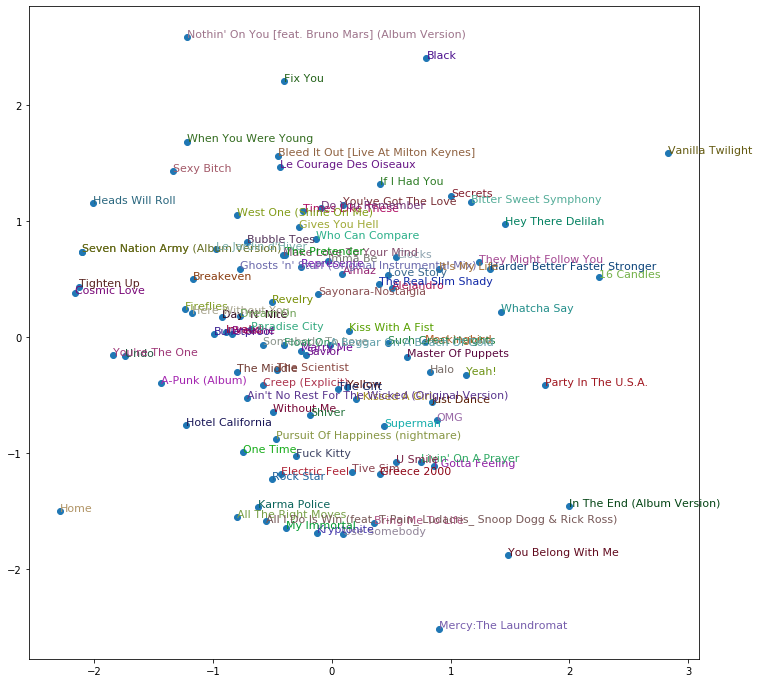

In [183]:
g = merged_data_cleaned2.groupby('title')['listen_count'].count()
top_songs = g.sort_values(ascending=False).index.values[:2000]
top_idxs = torch.tensor([d_title_song[m] for m in top_songs])
song_w = bb.song_factors[top_idxs].cpu().detach()
song_pca = pca(song_w,5)
fac0,fac1,fac2,fac3,fac4 = song_pca.t()
idxs = np.random.choice(len(top_songs), 30, replace=False)
idxs = list(range(100))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_songs[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

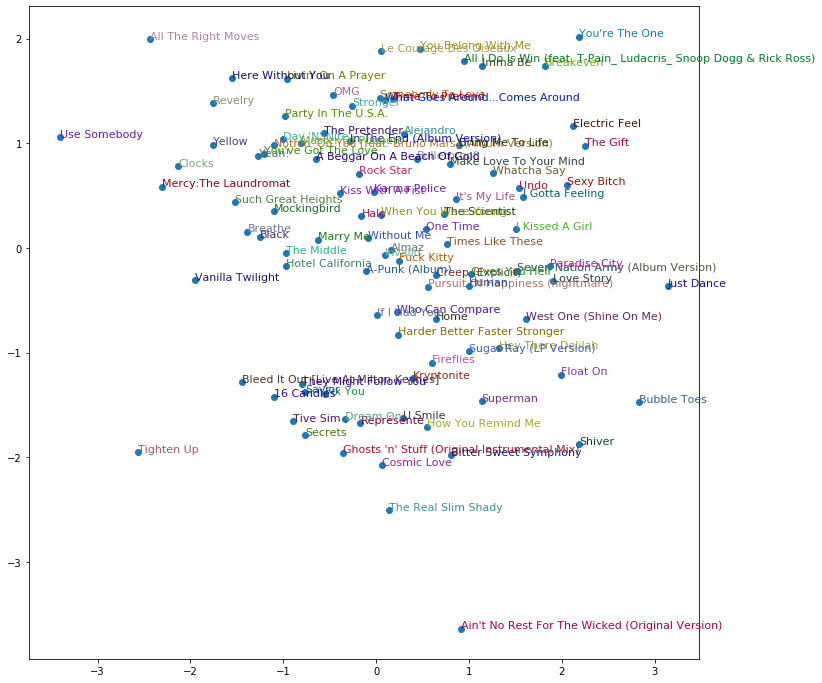

In [79]:
X = fac1[idxs]
Y = fac3[idxs]
plt.figure(figsize=(12,12))
plt.scatter(X, Y)
for i, x, y in zip(top_songs[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()